##  QTM 151 Final Project
*Group Members: Brooke Mills, Kaegan Ortlund, Madison Chen, Veronica Vargas*

### Introduction
Formula One (F1) is the highest level single seat car racing. Drivers compete in teams of two, with cars from manufacturers - Ferrari, McLaren, RedBull, Mercedes to name a few. The goal of each race is the be the first to cross the finish line after a certain number of laps. Each race is called a Grand Prix and there are a different number every year. Each track is different from the others and occurs in a different country. There are three parts to any race: practice, qualifying rounds, and the race itself. Practice lets drivers test their cars on the track. The Qualifying race has each driver complete laps by themselves to determine starting position. The race is the final and most important piece, where the drivers complete laps totaling up to a certain distance. Drivers are awarded points for both the position they finish in, and whether they set the fastest lap in a race. At the end of the season the points of each driver are totalled up to an overall rank. There are two main competitions in Formula 1: The constructors championshiop, where the team with the most total points is crouwned Constructors Champion, and the Driver's Championship, where the driver with most total points at the end of the season is crowned World Champion. 

Each country has their own F1 drivers. But what country has the best? Having the best atheletes is a point of pride for any country, but the statistics of individuals change every year, and can make it difficult to determine who has the best overall. And what makes a country have the best atheletes anyway? Is it having the fastest lap times? The higest rankings? 

We will analyze the lap speeds, number of wins, and overall ranking, to determine what country has the best drivers over all. (revise) 


**INCLUDE BRIEF DESCRIPTION OF RESULTS HERE**

### Data Description
* The first dataset we will use is 'Drivers'. Each row represents a driver and there are 857 drivers total in the dataest. This dataset contains information on each drivers ID and reference number, name, data of birth, and nationality. 

* The second dataset we will use is 'Results'. Each row represents a driver at a particular race and there are 25840 obesrvations in the dataest. This dataset contains information on the race ID, the driver number and ID, the starting position, finishing postion and time, points earned, and lap speed. 

* The thrid dataset we will use is 'Driver Standing'. Each row is an observation of a driver at a particular race and there are 33902 observations. This dataset contains information on the race ID, driver ID, postition in ranking at end of race, and total number of wins. 

* The fourth dataset we will use is 'Races'. Each row is an 



In [69]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Importing Libraries 
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
driver_standing = pd.read_csv("data_raw/driver_standings.csv")
races = pd.read_csv("data_raw/races.csv")

# calculating number of rows in each dataset
print(len(drivers))
print(len(results))
print(len(driver_standing))


857
25840
33902


### Merging: 


To create the final Dataset we first subset the columns from the drivers dataset that we will be using. These are the driver Id, which will be used as the key for merging, and the name of the driver and nationality. Then, we merge the drivers dataset with the results dataset, including only the results columns for lap time and rank. Finally, we merge this new dataset with the driver standings dataset, including the columns for number of wins and position. 

In [71]:
#filtering out unnecessary columns from drivers
drivers = drivers[["driverId", "surname", "nationality"]]

In [72]:
### Merging datasets

# Merehe 'Drivers' and 'Results'
merge1 = pd.merge(drivers,
                         results[["driverId", "raceId", "fastestLapTime", "rank", "points", "milliseconds"]],
                         on = "driverId",
                         how = "left")

# Merge with 'Races' dataset to get year, race
merge2 = pd.merge(merge1,
                         races[["year", "raceId", "name"]],
                         on = "raceId",
                         how = "left")

# Merge with 'Driver Standing' to get final dataset 
f1 = pd.merge(merge2,
                         driver_standing[["driverId","wins", "position", "raceId"]],
                         on = ["driverId", "raceId"],
                         how = "left")


### Data Cleaning:


To prepare the dataset for analysis, we first remove the NAs, which we recorded as a string in the orginial datasets. To do this we replace the NAs with the np.nan value from the library numpy. This allows us to complete analysis on the data without errors from the incalculable NAs. 

Next, we recode the columns for fastest lap and rank. These columns were recorded as strings, but in order to use them in calculations they should be numeric. We first transmute the fastest lap time column to a time value. Then we transmute the rank column to be numeric. Finally, we run a check on column types to ensure that the formationg in corrected. 

In [73]:
#Data Cleaning
#replacing NAs in 'fastestLapTime', 'rank', and 'milliseconds columns
f1["fastestLapTime"] = f1["fastestLapTime"].replace('\\N', np.nan)
f1["rank"] = f1["rank"].replace('\\N', np.nan)
f1['milliseconds'] = f1['milliseconds'].replace('\\N', np.nan)

In [74]:
# Data Recoding
f1["rank"] = pd.to_numeric(f1["rank"])
f1["milliseconds"] = pd.to_numeric(f1["milliseconds"])
print(f1.dtypes)

driverId            int64
surname            object
nationality        object
raceId            float64
fastestLapTime     object
rank              float64
points            float64
milliseconds      float64
year              float64
name               object
wins              float64
position          float64
dtype: object


### Descriptive Statistics: 


There are 42 nationalities that have been represented in Formula 1 since 1950, the top 5 being: British (165 drivers), American (158 drivers), Italian (99 drivers), French (73 drivers), and German (50 drivers). 

The nationality with the highest ever number of wins in one season (that is placing 1st) out of around 23 races (which varies per year), is Dutch at 15. Second is German at 13 and third is British at 11. 

Drivers compete to score points at each race, however to score points in Formula 1 a driver must place in the top 10 or set the fastest lap time. Anything below gives zero points. A typical season includes 20 drivers (each team with 2 drivers). This number varies as teams join or leave Formula 1. However, this means that many drivers fail to place in the top 10 during a race and gain zero points. In fact, the nationalities of Malaysia, Indonesia, American-Italian, East German, Czech, Argentine-Italian, Uruguayan, have never seen a driver place in the points. Monegasque drivers score the highest points on average at 6.5, followed by Dutch at 3.2, and Finnish at 3.8. British drivers have the most total points accumulated since 1950 (10,567), followed by German(7,947), and Finnish (4,379). 

Drivers also gain points by setting the fastest lap in a race, given a by placement (rank 1 = fastest, rank 2 = second fastest and so on).Nationalities with highest average rank are Columbian (6th fastest), Monegasque (7th fastest), and Finnish (8th fastest). In other words, thes nationalities have the put out, on average, the fastest, or fast laps.
 
This anlaysis includes the main columns of: 

* Driver ID: A unique code that represents each driver.
* Race ID: A unique code that represents each racetrack.
* Surname: The last name of each driver. 
* Nationality: The country each driver is a citizen of. 
* Rank: For each observation, or race, the rank refers to fastest lap compared to all drivers.
* Year: The season, or year of racing. 
* Name : The name of the circuit, or track.  
* Milliseconds: The finishing time. 
* Wins: The number of total wins a driver has obtained at the up to, and including the race. Note that this is a cumulative value. 
* Position: For each observation, or race, the position of finish (i.e. 1st, 2nd, 3rd, etc.)
* Points: The points given to each driver, determined by position and fastest lap time. 



In [75]:

### How many drivers are in each nationality? 

#subset to get unique driver name 
f1_subset1 = f1.drop_duplicates(subset = "driverId")

#group by and count
f1_agg2 = (f1_subset1.groupby("nationality")
                      .agg(Count = ('surname',len)))
#sort in descending order                      
f1_agg2.sort_values(by = "Count", ascending = False)



,Count
nationality,
British,165
American,158
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Swiss,23
South African,23


In [76]:
### Aggregating points, rank, and wins by nationality and by year

# creating df with recent years

f1_year_subset = f1.query("(year >= 2012.0) and (year < 2023)")

#subset to get desired columns
f1_subset = f1_year_subset[["nationality","points","rank","wins","year"]]

#group by and aggregate
f1_agg = (f1_subset.groupby("nationality")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           mean_rank = ('rank','mean'),
                           sd_rank = ('rank','std'),
                           mean_wins = ('wins','mean'),
                           sd_wins = ('wins','std')))  

f1_agg = f1_agg.dropna()

# display the df
display(f1_agg)   

# extract the df
f1_agg.to_csv("data_clean/f1_agg.csv")


# this data will be used for the histogram



,mean_points,sd_points,mean_rank,sd_rank,mean_wins,sd_wins
nationality,,,,,,
American,0.000000,0.000000,18.200000,1.483240,0.000000,0.000000
Australian,6.480769,7.068038,8.638462,5.579200,0.461538,0.811632
Belgian,0.604651,1.529699,12.348837,4.513914,0.000000,0.000000
Brazilian,3.603352,5.184700,10.156425,5.163408,0.000000,0.000000
British,7.973171,9.353343,8.991870,6.434961,1.434146,2.720139
Canadian,1.109290,2.837944,12.573770,5.075666,0.000000,0.000000
Chinese,0.272727,0.882735,11.818182,5.917177,0.000000,0.000000
Danish,1.260563,2.771894,12.161972,5.481933,0.000000,0.000000
Dutch,10.849727,9.513760,6.459016,5.853262,1.972678,3.223253


I only did the describtive statistics for overall - all races ever but 
you can factor in year or season if you'd like.

- remember wins is a cumulative column (make sure you only use wins from the races that are the last in the season if you're looking at total wins, just summing it up will be wrong)

- also consider that if one nationality has a ton of wins (dutch has the highest ever wins for one season but its only due to one driver) that doesnt necessarily mean they're better than another nationality that has several good drivers...or maybe one driver was driving for many years and others for only a few years (just some factors that can determine what makes a nationality "best")

- remember points is cumulative and restarts at every season (and drivers also gain points if they set the fastest lap)

- you can also use points for consistency if you want (to get points uou have to place in the top 10, anything under and you get zero) as well as wins or whatever other measure

- i noticed that when recoding fastestlaptime to date.time type it messed it up a lot so I undid it. 

- Rank is NOT the drivers overall rank in the season competitions it is the rank of fastest lap compared to other drivers - also im pretty sure this data includes practice sessions bc the times aren't the same as the official world records

# Results and Analysis 

### Model 1: Examining the consististency of rankings for fastest nations for the last 5 Seasons of F1 Racing

Context: While being a fast driver is definetly a a good quality, the consistency to aquire points represenative of  ranking and time is significant for predicting how well drivers must do to stay competitive. As such, understanding drivers' consistency to aquire points, especially when you are the top, is vital to maintain a compeittive edge over others. By assessing the average points of nations across 15 seasons, we will be able to assess how consistent the top 5 nations with the most wins overall are with obtaining points. 

Intent: Examine from 2008-2002s seasons the top nationalities' changes in average points in a "spaghetti plot" 
Components of graph: 
- x axis will be a timeline from 2008 to 2022 
- y axis will be average number of points 
- colored lines across graph will represent the different nationalities and their consistency of aquiring the same average amount of points across 15 years? 

In [77]:
#dataset creation that takes year, avg points, 
#and nationality (top 5 are based off of overall max wins)
#top 5 are Dutch, German, British, Finnish, Brazilian
consist_df = f1[["year","nationality","points"]]

consist_stats = (consist_df.groupby(["nationality", "year"])
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           sum_points = ('points', 'sum'))) 

consist_stats =  consist_stats.reset_index() 
#consist_stats should now have avg/sd/sum points per 
#nationality for every year

#taking plotting data of top 5 winners of 2022 and past 5 years
pastfive = [2007,2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020, 2021,2022]
win5 = ['Dutch', 'German', 'British', 'Finnish', 'Brazilian']
consist_plotdat = consist_stats[(consist_stats['year'].isin(pastfive))
                                & (consist_stats['nationality'].isin(win5))]



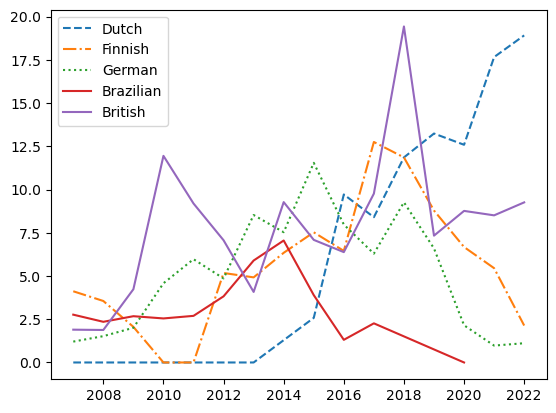

In [10]:
#dividing up by nationality 
Dutch = (consist_plotdat.query("'Dutch' == nationality"))
Finnish = (consist_plotdat.query("'Finnish' == nationality"))
German = (consist_plotdat.query("'German' == nationality"))
British = (consist_plotdat.query("'British' == nationality"))
Brazilian = (consist_plotdat.query("'Brazilian' == nationality"))
#making the plot 
plt.plot(Dutch["year"], Dutch["mean_points"], label = "Dutch", linestyle = "--")
plt.plot(Finnish["year"], Finnish["mean_points"], label = "Finnish", linestyle = "-.")
plt.plot(German["year"], German["mean_points"], label = "German", linestyle = ":")
plt.plot(Brazilian["year"], Brazilian["mean_points"], label = "Brazilian" )
plt.plot(British["year"], British["mean_points"], label = "British")
plt.legend()
plt.show()

### Model 2: Investigating the average fastest drivers' milliseconds for the the most recent season (2022)

Context: In F1 racing, every millisecond counts towards a winning position and aquiring points. 

Goal: Take the fastest individual from the top five winning nations, compare them to each other?? whoever has the lowest millisecond time is the best driver with the fastest speed. 

Plot: Make a scatterplot
- X axis is nation (color within each thing can be an individual) 
- y axis is milliseconds 

In [ ]:
#separating the data so that we can look at nationality, surname, milliseconds, and year?
speed_df = f1[["year","nationality","surname", "milliseconds"]]
spped_df = speed_df.query("2022 == year")
#grouping by and aggregating the top individuals for the seasons 
speed_indv = (recent_szn.groupby(["surname", "nationality"])
                      .agg(mean_secs = ('milliseconds','mean'),
                           sd_secs =   ('milliseconds','std'),
                           sum_secs = ('milliseconds', 'sum'))) 
speed_indv = speed_indv.reset_index()
speed_indv.sort_values(by = 'mean_secs', ascending = True)


In [ ]:
from matplotlib import colormaps
#making a scatterplot 
plt.scatter( x= speed_indv["surname"], y= speed_indv["mean_secs"], marker = "X",
            cmap = "Set2")
plt.xticks(rotation= 45, size = 8, ha = "right") 
plt.title("Fastest Drivers in the F1 2022 Season")
plt.xlabel("Driver surname")
plt.ylabel("Average Milliseconds")
plt.show()

##working, but need to get the colors to show nationality so will need help

## Model 3:
### Investigating the average points, rank, and wins by nationality as a measure of performance and consistency.

The following section features histograms investigating the average points, rank, and wins by nationality. Each variable also includes a histogram showing the standard deviation of each nationality to determine the consistency of the racers. The lower the standard deviation, the more consistent the drivers are within that nationality. 

## Barplots featuring the mean/standard deviation of points by nationality

In [80]:
f1_agg_reset

,nationality,mean_points,sd_points,mean_rank,sd_rank,mean_wins,sd_wins
0,American,0.000000,0.000000,18.200000,1.483240,0.000000,0.000000
1,Australian,6.480769,7.068038,8.638462,5.579200,0.461538,0.811632
2,Belgian,0.604651,1.529699,12.348837,4.513914,0.000000,0.000000
3,Brazilian,3.603352,5.184700,10.156425,5.163408,0.000000,0.000000
4,British,7.973171,9.353343,8.991870,6.434961,1.434146,2.720139
5,Canadian,1.109290,2.837944,12.573770,5.075666,0.000000,0.000000
6,Chinese,0.272727,0.882735,11.818182,5.917177,0.000000,0.000000
7,Danish,1.260563,2.771894,12.161972,5.481933,0.000000,0.000000
8,Dutch,10.849727,9.513760,6.459016,5.853262,1.972678,3.223253
9,Finnish,7.349282,7.451040,7.858852,5.430766,0.318182,0.707415


<Figure size 640x480 with 0 Axes>

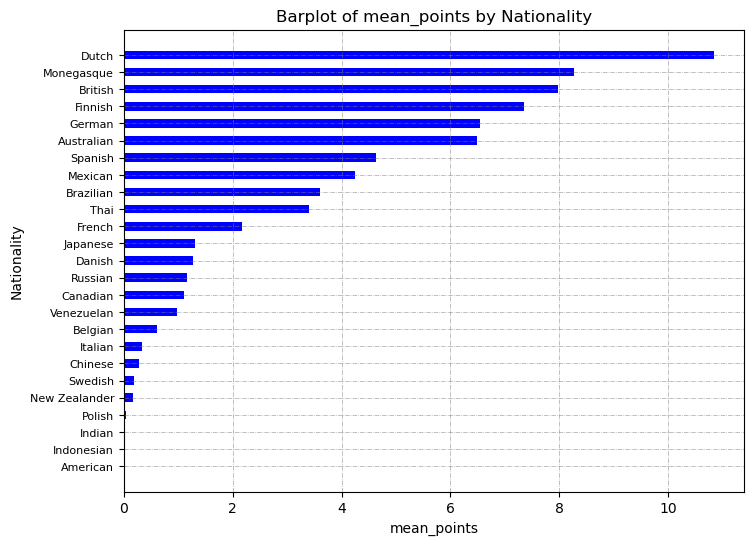

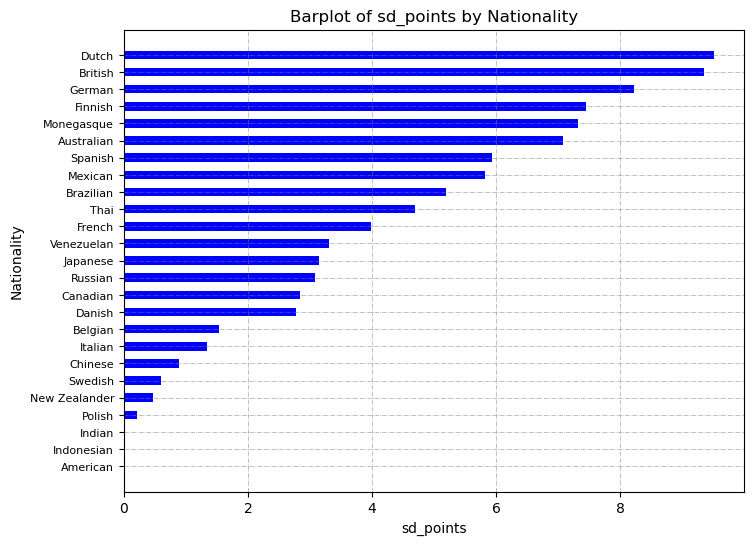

In [136]:
# resetting the group_by column
# now nationality is a variable 
f1_agg_reset = f1_agg.reset_index()

#save the new df
f1_agg_reset.to_csv("data_clean/f1_agg.csv")


# create a list of the variables in the df
list_variables = ["mean_points","sd_points"]

# tight layout ensuring no labels overlap
plt.tight_layout()

# graph barplot using for loop
index = 1
for vars_name in list_variables:
    # sorting values in order
    f1_agg_reset.sort_values(vars_name,inplace=True)
    plt.figure(figsize = (8, 6))
    # creating a horizontal barplot
    plt.barh(f1_agg_reset["nationality"], f1_agg_reset[vars_name],
         color ='blue', height = 0.5)
    # putting labels
    plt.ylabel("Nationality")
    plt.xlabel(vars_name)
    # creating a grid
    plt.grid(True, color ='grey', linestyle ='-.',
        linewidth = 0.5, alpha = 0.7)
    plt.title("Barplot of" + " " + vars_name + " " + "by Nationality")
    # changing the font size
    plt.yticks(fontsize=8)
    plt.show()
    index = index + 1



## Barplots featuring the mean/standard deviation of wins by nationality

<Figure size 640x480 with 0 Axes>

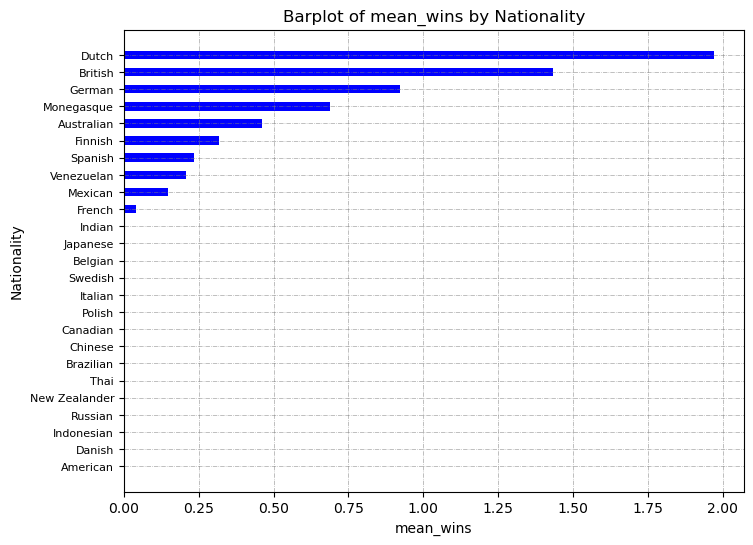

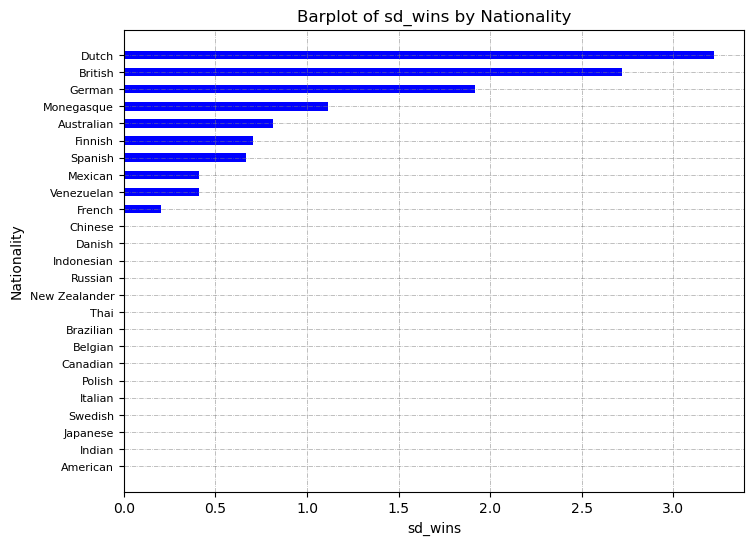

In [134]:
# create a list of the variables in the df
list_variables = ["mean_wins","sd_wins"]

# tight layout ensuring no labels overlap
plt.tight_layout()

# graph barplot using for loop
index = 1
for vars_name in list_variables:
    # sorting values in order
    f1_agg_reset.sort_values(vars_name,inplace=True)
    plt.figure(figsize = (8, 6))
    # creating a horizontal barplot
    plt.barh(f1_agg_reset["nationality"], f1_agg_reset[vars_name],
         color ='blue', height = 0.5)
    # putting labels
    plt.ylabel("Nationality")
    plt.xlabel(vars_name)
    # creating a grid
    plt.grid(True, color ='grey', linestyle ='-.',
        linewidth = 0.5, alpha = 0.7)
    plt.title("Barplot of" + " " + vars_name + " " + "by Nationality")
    # changing the font size
    plt.yticks(fontsize=8)
    plt.show()
    index = index + 1

